In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# notebooks/example_notebook.ipynb

import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries
from data_exploration import explore_data
from data_formating import format_data
from data_clearing import clean_large_dataframe


In [4]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\User\Desktop\week-2-investment-analysis\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [5]:
df = clean_large_dataframe(df)

c:\Users\User\Desktop\week-2-investment-analysis\scripts\data_clearing.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mean_value, inplace=True)
c:\Users\User\Desktop\week-2-investment-analysis\scripts\data_clearing.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [6]:
df = format_data(df)

In [1]:
from customer_overview import plot_xdr_sessions,plot_session_duration,plot_total_data_volume,plot_dl_ul_data,plot_top_10_handsets,plot_top_3_manufacturers

ModuleNotFoundError: No module named 'customer_overview'

In [21]:
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [2]:
plot_top_10_handsets
plot_top_3_manufacturers
plot_xdr_sessions(df)
plot_session_duration(df)
plot_dl_ul_data(df)
plot_total_data_volume(df)


NameError: name 'plot_top_10_handsets' is not defined

In [8]:
from user_overview_analysis import (
    handle_missing_values,
    aggregate_user_behavior,
    describe_variables,
    perform_variable_transformations,
    compute_dispersion,
    plot_graphical_analysis,
    correlation_analysis,
    perform_pca,
)

In [9]:
df=handle_missing_values(df,50)

Unsupported strategy for numeric columns. Use 'mean' or 'median'.


In [10]:
# Aggregate user behavior
user_behavior = aggregate_user_behavior(df)
print(user_behavior.head())


           IMSI  total_xDR_sessions  total_session_duration  \
0  2.040471e+14                   1                869844.0   
1  2.040808e+14                   1                877385.0   
2  2.082001e+14                   1                 86019.0   
3  2.082001e+14                   1                 86254.0   
4  2.082001e+14                   2                573923.0   

   total_Social Media_data  total_Google_data  total_Email_data  \
0                1546088.0          9218647.0         3330974.0   
1                 715224.0         10438660.0         1520771.0   
2                3122781.0          1624662.0         3657501.0   
3                2577104.0         13811478.0         3855734.0   
4                3426716.0         11665887.0         5564462.0   

   total_YouTube_data  total_Netflix_data  total_Gaming_data  total_Other_data  
0          40940710.0          28846230.0         43070260.0      4.013605e+08  
1          11959905.0          26592300.0        1780487

In [11]:
# Describe variables
describe_variables(user_behavior)

# Perform variable transformations
decile_summary = perform_variable_transformations(user_behavior)
print(decile_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107266 entries, 0 to 107265
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   IMSI                     107266 non-null  float64
 1   total_xDR_sessions       107266 non-null  int64  
 2   total_session_duration   107266 non-null  float64
 3   total_Social Media_data  107266 non-null  float64
 4   total_Google_data        107266 non-null  float64
 5   total_Email_data         107266 non-null  float64
 6   total_YouTube_data       107266 non-null  float64
 7   total_Netflix_data       107266 non-null  float64
 8   total_Gaming_data        107266 non-null  float64
 9   total_Other_data         107266 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 8.2 MB
None
               IMSI  total_xDR_sessions  total_session_duration  \
count  1.072660e+05       107266.000000            1.072660e+05   
mean   2.082016e+14            1.398402 

KeyError: "Missing required columns: 'Total DL (Bytes)' or 'Total UL (Bytes)'"

In [11]:
# Compute dispersion metrics
compute_dispersion(user_behavior)


                                 mean           std           min  \
IMSI                     2.082016e+14  2.534974e+10  2.040471e+14   
total_xDR_sessions       1.398402e+00  1.913978e+00  1.000000e+00   
total_session_duration   1.462848e+05  2.186617e+05  7.142000e+03   
total_Social Media_data  2.556629e+06  3.732520e+06  1.563000e+03   
total_Google_data        1.091774e+07  1.533771e+07  4.033000e+04   
total_Email_data         3.159133e+06  4.542357e+06  1.817600e+04   
total_YouTube_data       3.166469e+07  4.518120e+07  7.890300e+04   
total_Netflix_data       3.164389e+07  4.530043e+07  1.845690e+05   
total_Gaming_data        6.017787e+08  8.687247e+08  3.063580e+05   
total_Other_data         6.004254e+08  8.552843e+08  1.490450e+05   

                                  25%           50%           75%  \
IMSI                     2.082010e+14  2.082015e+14  2.082018e+14   
total_xDR_sessions       1.000000e+00  1.000000e+00  2.000000e+00   
total_session_duration   7.041275

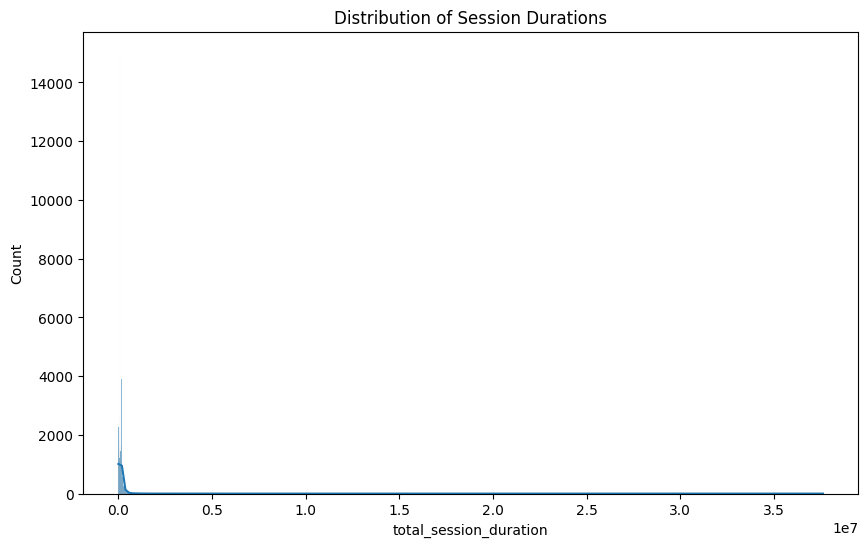

In [14]:
# Plot session duration distribution
plot_graphical_analysis(user_behavior)


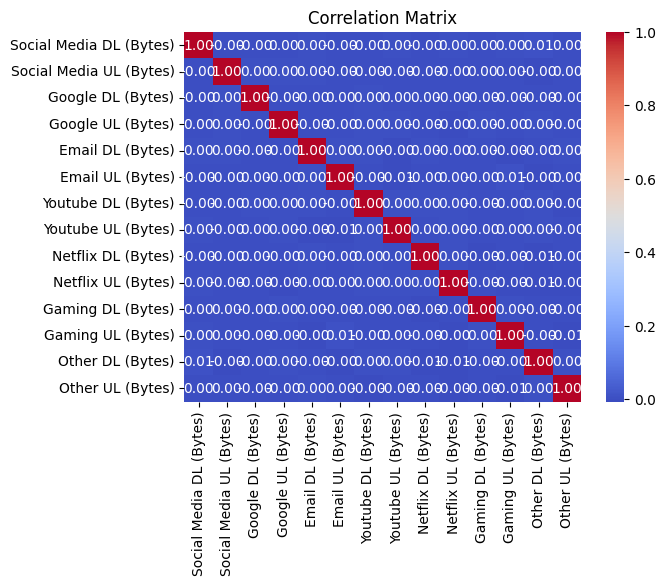

In [15]:
# Define application columns for correlation analysis
app_columns = [
    "Social Media DL (Bytes)", "Social Media UL (Bytes)", 
    "Google DL (Bytes)", "Google UL (Bytes)", 
    "Email DL (Bytes)", "Email UL (Bytes)", 
    "Youtube DL (Bytes)", "Youtube UL (Bytes)",
    "Netflix DL (Bytes)", "Netflix UL (Bytes)",
    "Gaming DL (Bytes)", "Gaming UL (Bytes)",
    "Other DL (Bytes)", "Other UL (Bytes)"
]

# Perform and visualize correlation analysis
correlation_analysis(df, app_columns)


In [16]:
# Perform PCA
principal_components = perform_pca(df, app_columns)


Explained Variance: [5.01055802e-01 4.97000005e-01 3.80509854e-04 3.78644979e-04
 3.40493798e-04 3.38252142e-04 1.93103920e-04 1.90530723e-04
 9.20932030e-05 1.19079131e-05 9.06348816e-06 8.97712430e-06
 6.12912566e-07 3.03792287e-09]
